In [1]:
import nltk

In [2]:
import re

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
from nltk.probability import FreqDist

In [5]:
import matplotlib.pyplot as plt

ID do corpus

In [9]:
nltk_id = 'gutenberg'


In [10]:
nltk.download(nltk_id)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [32]:
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [13]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

In [14]:
print(emma)

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

Vamos fazer o seguinte:
* Selecionar apenas letras (remover pontuação, números e outros caracteres)
* Converter o texto para letra minúscula

In [15]:
emma_letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', emma.lower())

In [16]:
print(emma_letras_min)

['emma', 'by', 'jane', 'austen', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', 'she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', 'indulgent', 'father', 'and', 'had', 'in', 'consequence', 'of', 'her', 'sister', 's', 'marriage', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', 'her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an', 'excellent', 'woman', 'as', 'governess', 'who', 'had', 'fallen', 'little', 'sho

Agora vamos remover as stopwords, ou seja, as palavras que não possuem valor semântico para a busca (exemplo: artigos e preposições. O NLTK fornece bibliotecas de stopwords para vários idiomas.

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
list_stopwords_ingles = set(stopwords)

In [22]:
emma_letras_min_semstop = [w for w in emma_letras_min if w not in list_stopwords_ingles]

In [23]:
print(emma_letras_min_semstop)

['emma', 'jane', 'austen', 'volume', 'chapter', 'emma', 'woodhouse', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence', 'lived', 'nearly', 'twenty', 'one', 'years', 'world', 'little', 'distress', 'vex', 'youngest', 'two', 'daughters', 'affectionate', 'indulgent', 'father', 'consequence', 'sister', 'marriage', 'mistress', 'house', 'early', 'period', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'caresses', 'place', 'supplied', 'excellent', 'woman', 'governess', 'fallen', 'little', 'short', 'mother', 'affection', 'sixteen', 'years', 'miss', 'taylor', 'mr', 'woodhouse', 'family', 'less', 'governess', 'friend', 'fond', 'daughters', 'particularly', 'emma', '_them_', 'intimacy', 'sisters', 'even', 'miss', 'taylor', 'ceased', 'hold', 'nominal', 'office', 'governess', 'mildness', 'temper', 'hardly', 'allowed', 'impose', 'restraint', 'shadow', 'authority', 'long', 'passed', 'away', 'living', 'together

Também podemos trabalhar com radicais (stemming). Existem duas formas aqui:

*   Stemming - "corta" as palavras usando a raiz como base
*   Lemmatization - reduz as palavras a forma verdadeira da raiz

Exemplo: andando

*   Stemming - anda
*   Lemmatization - andar

Lemmatization é uma função mais complexa, portanto, se o texto for muito grande pode demorar um pouco para executá-la.

O nltk possui duas funções para stemming: Porter (PorterStemmer) e Lancaster (LancasterStemmer). Ele também possui um lemmatizador (WordNetLemmatizer).


In [24]:
porter = nltk.PorterStemmer()

In [25]:
emma_letras_min_semstop_stem = [porter.stem(t) for t in emma_letras_min_semstop]

In [26]:
print(emma_letras_min_semstop_stem)

['emma', 'jane', 'austen', 'volum', 'chapter', 'emma', 'woodhous', 'handsom', 'clever', 'rich', 'comfort', 'home', 'happi', 'disposit', 'seem', 'unit', 'best', 'bless', 'exist', 'live', 'nearli', 'twenti', 'one', 'year', 'world', 'littl', 'distress', 'vex', 'youngest', 'two', 'daughter', 'affection', 'indulg', 'father', 'consequ', 'sister', 'marriag', 'mistress', 'hous', 'earli', 'period', 'mother', 'die', 'long', 'ago', 'indistinct', 'remembr', 'caress', 'place', 'suppli', 'excel', 'woman', 'gover', 'fallen', 'littl', 'short', 'mother', 'affect', 'sixteen', 'year', 'miss', 'taylor', 'mr', 'woodhous', 'famili', 'less', 'gover', 'friend', 'fond', 'daughter', 'particularli', 'emma', '_them_', 'intimaci', 'sister', 'even', 'miss', 'taylor', 'ceas', 'hold', 'nomin', 'offic', 'gover', 'mild', 'temper', 'hardli', 'allow', 'impos', 'restraint', 'shadow', 'author', 'long', 'pass', 'away', 'live', 'togeth', 'friend', 'friend', 'mutual', 'attach', 'emma', 'like', 'highli', 'esteem', 'miss', 'tay

Vamos ver a frequência de ocorrência dos termos e tentar enxergar diferenças entre o texto processado com e sem stemming.

In [27]:
freq_sem_stem = FreqDist(emma_letras_min_semstop)
freq_com_stem = FreqDist(emma_letras_min_semstop_stem)

In [28]:
print("20 palavras mais frequentes sem stem:")
print(freq_sem_stem.most_common(20))

20 palavras mais frequentes sem stem:
[('mr', 1153), ('emma', 865), ('could', 837), ('would', 820), ('mrs', 699), ('miss', 599), ('must', 567), ('harriet', 506), ('much', 486), ('said', 484), ('one', 452), ('weston', 440), ('every', 435), ('well', 401), ('thing', 398), ('knightley', 389), ('elton', 385), ('think', 383), ('little', 359), ('never', 358)]


In [29]:
print("20 palavras mais frequentes com stem:")
print(freq_com_stem.most_common(20))

20 palavras mais frequentes com stem:
[('mr', 1852), ('emma', 865), ('could', 837), ('would', 820), ('miss', 611), ('must', 567), ('harriet', 506), ('much', 486), ('said', 484), ('think', 466), ('thing', 460), ('one', 456), ('weston', 448), ('everi', 435), ('elton', 407), ('well', 401), ('knightley', 396), ('know', 393), ('say', 392), ('good', 365)]


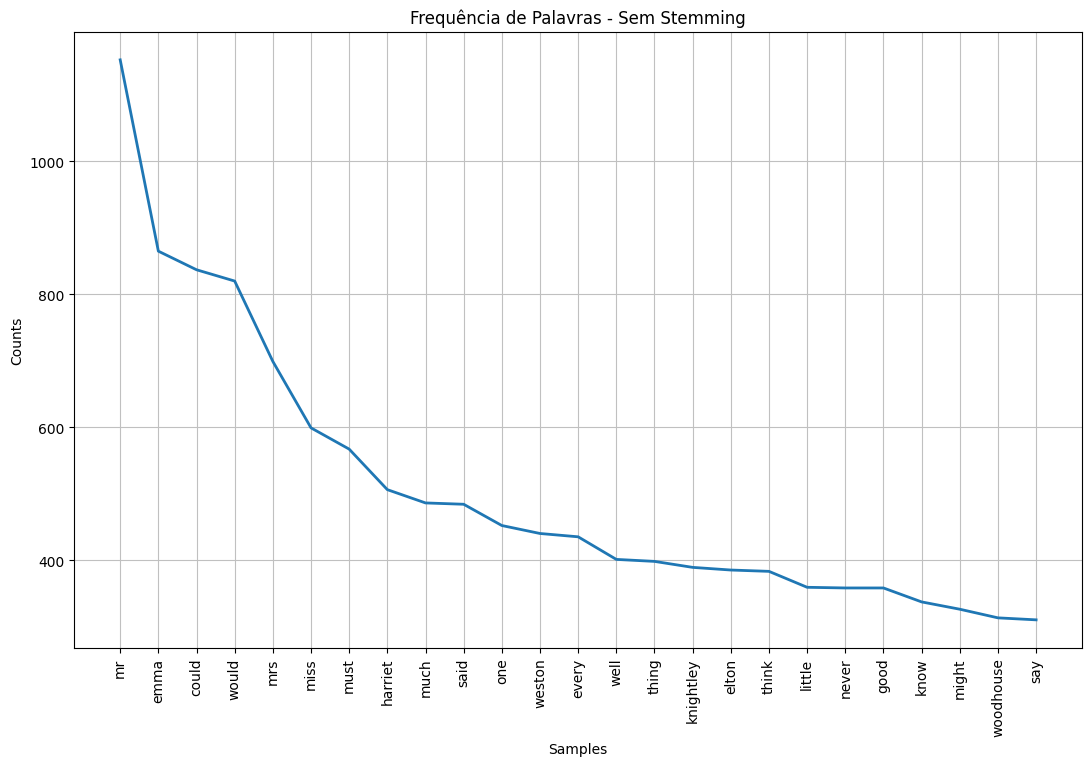

<Axes: title={'center': 'Frequência de Palavras - Sem Stemming'}, xlabel='Samples', ylabel='Counts'>

In [30]:
plt.figure(figsize = (13, 8))
freq_sem_stem.plot(25, title = "Frequência de Palavras - Sem Stemming")

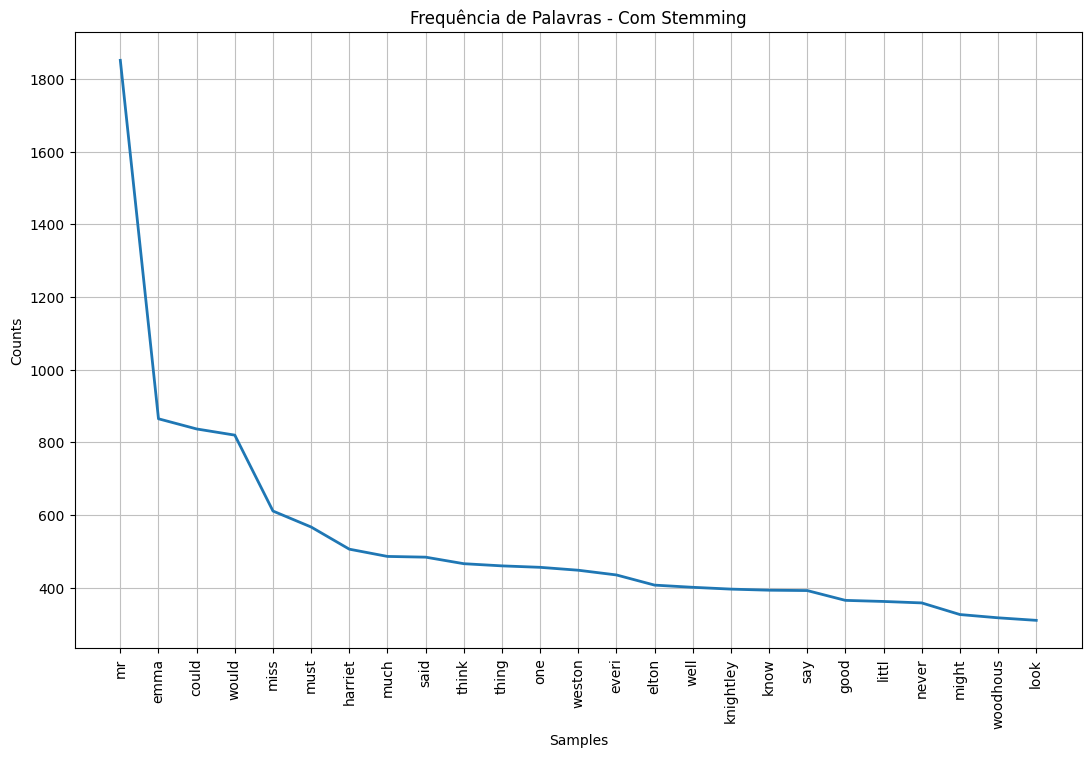

<Axes: title={'center': 'Frequência de Palavras - Com Stemming'}, xlabel='Samples', ylabel='Counts'>

In [31]:
plt.figure(figsize = (13, 8))
freq_com_stem.plot(25, title = "Frequência de Palavras - Com Stemming")